# Part II - What Characteristics Make a Loan Risky
## by Robert Neubauer

## Investigation Overview

In this investigation, I wanted to look at what characteristics make a loan risky and safe. I looked at what relationship certain variables have with credit grade.

## Dataset Overview

This data set has 113,937 loans and 81 variables. I used 15 variables for this analysis. How loans are graded on a scale of AA through HR. AA being the highest grade a loan could have while HR is the lowest. 

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

## BorrowerRate for each Credit Grade

As the grading gets lower, the distribution for each grade is more spread out and gradually increases. The box plots inside each credit grade get more prominent as the grade gets riskier.

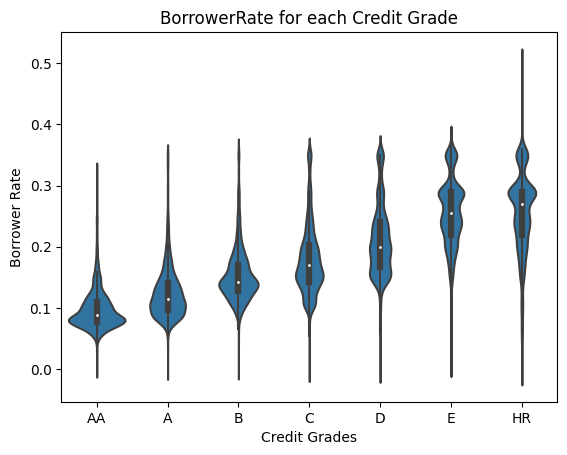

In [9]:
def labels(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

color = sb.color_palette()[0]
creditgrade_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

sb.violinplot(data=loans, x=loans['CreditGrade'], y=loans['BorrowerRate'], color=color, order= creditgrade_order)
labels('Credit Grades', 'Borrower Rate', 'BorrowerRate for each Credit Grade');

## CurrentDelinquencies and BorrowerAPR for each Credit Grade 

Similar to the previous visualization, the distribution increases with the riskier grades. The average current delinquencies for an "AA" loan sits close to zero, while loans with an "HR" grade are higher and have more outliers.

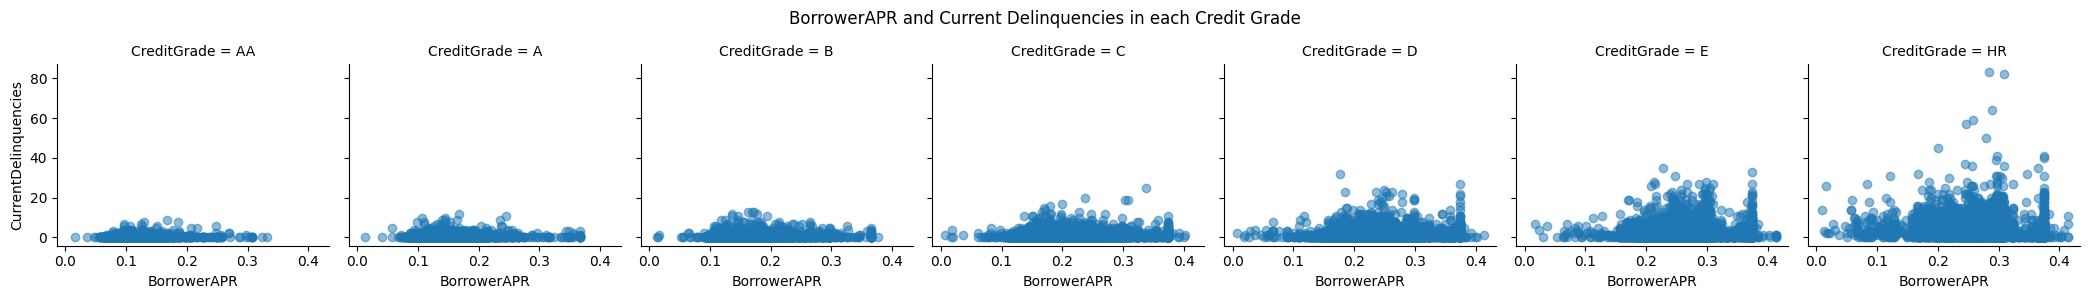

In [10]:
loan_variables2 = ['CreditGrade', 'BorrowerAPR', 'CurrentDelinquencies']
i = sb.FacetGrid(data = loans, col='CreditGrade', col_order= creditgrade_order, )
i.map(plt.scatter, 'BorrowerAPR', 'CurrentDelinquencies', alpha= 0.5)
i.fig.suptitle('BorrowerAPR and Current Delinquencies in each Credit Grade')
i.fig.subplots_adjust(top=0.8);

## Credit Score Range (Upper) and Credit Grade

The same trend persists when comparing credit score range upper for each credit grade. "AA," "E," and "HR" are the only box plots with a minimum or maximum.

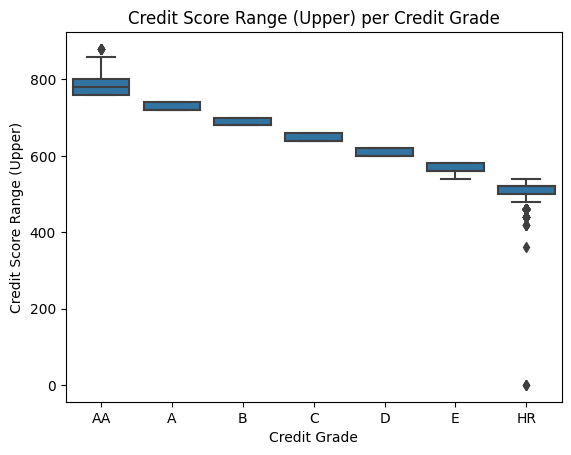

In [11]:
sb.boxplot(data=loans, x='CreditGrade', y='CreditScoreRangeLower', color=color ,order=creditgrade_order)
labels('Credit Grade', 'Credit Score Range (Upper)', 'Credit Score Range (Upper) per Credit Grade');

In [12]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt 